In [1]:
import partridge as ptg
import datetime
import geopandas as gpd
from shapely.geometry import Point
import osmnx as ox
import networkx as nx
import pandas as pd
import os
from shapely.geometry import mapping, shape
from shapely.ops import cascaded_union
from fiona import collection
%matplotlib inline

In [2]:
path=r"N:\Planning - New File Structure\GIS\Data\GTFS\VRT5_10_18.zip"

In [3]:
service_ids_by_date=ptg.read_service_ids_by_date(path)

In [4]:
date=datetime.date(2018, 6, 4)

In [5]:
service_ids=service_ids_by_date[date]

In [6]:
feed=ptg.feed(path,view={
    'trips.txt':{
        'service_id':service_ids,
    },
})

In [7]:
#assert service_ids==set(feed.trips.service_id)

In [8]:
df=feed.stops

In [9]:
df['Coordinates']=list(zip(df.stop_lat,df.stop_lon))

In [10]:
df.set_index('stop_name')

,stop_id,stop_code,stop_desc,stop_lat,stop_lon,zone_id,Coordinates
stop_name,,,,,,,
University & Chrisway,01010155,NaN,NaN,43.603910,-116.207217,zoneforstop_VRT_42,"(43.603909508306046, -116.20721675602077)"
Lincoln & University,01010158,NaN,NaN,43.601055,-116.202444,zoneforstop_VRT_44,"(43.60105498248787, -116.20244428219452)"
Beacon & Lincoln,01010640,NaN,NaN,43.598315,-116.201776,zoneforstop_VRT_46,"(43.598315481598576, -116.20177589748256)"
Beacon & Manitou,01010638,NaN,NaN,43.598329,-116.198737,zoneforstop_VRT_47,"(43.59832888786902, -116.1987372011365)"
Beacon & Grant,01010498,NaN,NaN,43.598322,-116.196294,zoneforstop_VRT_49,"(43.59832154327328, -116.19629360681816)"
Beacon & Broadway,01010635,NaN,NaN,43.598300,-116.193760,zoneforstop_VRT_51,"(43.598299999910004, -116.19376026058443)"
Beacon & Colorado,01010633,NaN,NaN,43.598340,-116.189893,zoneforstop_VRT_52,"(43.59833999991, -116.18989251518495)"
Beacon & Parkcenter,01010427,NaN,NaN,43.598578,-116.187215,zoneforstop_VRT_53,"(43.598578041622645, -116.18721526481787)"
Parkcenter & Mallard,01010429,NaN,NaN,43.596623,-116.178125,zoneforstop_VRT_55,"(43.596622643821696, -116.17812494029491)"


In [11]:
outfolder=r"N:\Planning - New File Structure\GIS\Data\Stops\Walksheds\Qtr"

In [12]:
for index, row in df.iterrows():
    try:
        stopname=row['stop_name']+"_"+row['stop_id']
        ox.save_graph_shapefile((ox.graph_from_point(row['Coordinates'],distance=200,network_type='walk')),folder=outfolder,filename=stopname+'qtr')
        print(stopname)
    except Exception:
        print(stopname+"ERROR")
        continue
    

C:\Users\bparker\AppData\Local\conda\conda\envs\mappingPy3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


University & Chrisway_01010155
Lincoln & University_01010158
Beacon & Lincoln_01010640
Beacon & Manitou_01010638
Beacon & Grant_01010498
Beacon & Broadway_01010635
Beacon & Colorado_01010633
Beacon & Parkcenter_01010427
Parkcenter & Mallard_01010429
Parkcenter & River Run_01010433
Parkcenter & Apple_01010437
Bergeson & Federal Way_01010458
Federal Way @ Fred Meyer_01010204
Bergeson & Mount Vernon_01010457
Bergeson & Minuteman_01010455
Appple & Lexington_01010439
Parkcenter & River Run_01010434
Beacon & Colorado_01010634
Beacon & Manitou_01010637
Beacon & Lincoln_01010639
Capitol & Cesar Chavez_01010106
Capitol & Front_01010109
Broadway & Main_01010496
Broadway & Dundee_01010658
Broadway & Linden_01010660
Broadway & Federal Way_01010661
Federal Way & TK_01010200
Gekeler & Ridgefield_01010210
Gekeler & Iowa_01010222
Apple & Boise_01010440
Broadway & Iowa_01010649
Curtis & Franklin_01010545
Washington & Coston_01010512
Logan & Fairview_14010064
CWI Main Campus_14050009
9th & Royal_0101014

Maple Grove & Holbrook_01010271
Maple Grove & Fairview_01010251
Maple Grove & Irving_01010250
Emerald & Maple Grove_01010270ERROR
Emerald & Benjamin_01010744
Emerald & Milwaukee_01010745
Emerald & Rifleman_01010849
State & 9th_01010607
State & 11th_01010603
State & 13th_01010601
State & 15th_01010604
State & 17th_01010605
State & 21st_01010861
State & 23rd_01010862
State & 26th_01010863
28th & Lemp_01010460
28th & Good_01010463
28th & Sunset_01010465
28th & Smith_01010566
Taft & 28th_01010564
Taft & 36th_01010559
36th & Magnolia_01010558
Catalpa & Tamarack_01010552
Catalpa & Sycamore_01010549
Catalpa & Collister_01010376
Collister & Castlebar_01010374
Collister & Shirley_01010371
Collister & Hill_01010370
Castle & Stinger_01010368
Castle & Eugene_01010364
Castle & Castle Hill_01010365
Hill & Collister_01010369
Collister & Shirley_01010372
Collister & Johns Landing_01010373
Collister & Catalpa_01010375
36th & Shasta_01010555
Taft & 36th_01010560
28th & Sunset_01010466
State & 27th_01010

Five Mile & Goldenrod_01010317
McMillian & Five Mile_01010320
McMillian & Farrow_01010321
McMillian & Lena_01010325
McMillian & Cloverdale_1010327
Cloverdale & Hickory_01010329
Cloverdale & DeMeyer_01010331
Discovery Way & Chinden Blvd. SEC_01010338
Chinden @ Hewlett Packard_01010859
Fairview & Larch_01010798
Fairview & Curtis_010101799
Five Mile & Hickory_01010889
Fairview & Allumbaugh_01010803
Five Mile & McMillian_01010890
Five Mile & Goldenrod_01010318
Five Mile & Edna_01010316
Fairview & Cole_01010787
Five Mile & Covered Wagon_01010314
Five Mile & Country Squire_01010313
Fairview & Westgate_01010933
Five Mile & Ustick_01010311
Five Mile & Excalibur_01010309
Five Mile & Java_01010308
Five Mile & Halstead_01010304
Five Mile & Fairview_01010301
Five Mile & Susan_01010300
Milwaukee & Fairview_01010751
Five Mile & Emerald_01010297
Emerald & Five Mile_01010263
Milwaukee & Holt_01010754
Emerald & Armstrong_01010265
Milwaukee & Northview_01010756
Emerald & Kimball_01010260
Milwaukee & Ust

In [13]:
# UandChris=ox.graph_from_point((43.603909508306046, -116.20721675602077),distance=400,distance_type='network',network_type='walk')
# ox.save_graphml(UandChris,filename=r"N:\Planning - New File Structure\GIS\Data\Walksheds\UandChris.graphml")
# UandChris2=ox.load_graphml(r"N:\Planning - New File Structure\GIS\Data\Walksheds\UandChris.graphml")
# ox.plot_graph(UandChris)

In [14]:
# LincandU=ox.graph_from_point((43.60105498248787, -116.20244428219452),distance=400,distance_type='network',network_type='walk')
# ox.save_graphml(LincandU,filename=r"N:\Planning - New File Structure\GIS\Data\Walksheds\LincandU.graphml")
# LincandU2=ox.load_graphml(r"N:\Planning - New File Structure\GIS\Data\Walksheds\LincandU.graphml")
# ox.plot_graph(LincandU)

In [15]:
# twostops=nx.compose(UandChris2,LincandU2)

In [16]:
# ox.plot_graph(twostops)

In [17]:
# for i in os.listdir(outfolder):
#     newlayer=gpd.read_file(outfolder+"\\"+i+"\\edges\\edges.shp")
#     print(i)
#     allwalksheds=newlayer.merge(newlayer,on='osmid')


In [18]:
# for i in os.listdir(outfolder):
#     d={}
#     d['{}'.format(i)]=gpd.read_file(outfolder+"\\"+i+"\\edges\\edges.shp")
#     print(i)

In [19]:
# for key,values in d.items():
#     allwalksheds=allwalksheds.merge(values,on='osmid')
#     print(key)

In [20]:
allwalksheds=[]
allwalksheds=gpd.GeoDataFrame(allwalksheds)
d={}

In [21]:
def reader():
    for i in os.listdir(outfolder):
        d['{}'.format(i)]=gpd.read_file(outfolder+"\\"+i+"\\edges\\edges.shp")
        print('reading: '+i)
    for key,value in d.items():
        allwalksheds.append(value[:])
        print('appending: '+ key)
        return allwalksheds
    allwalksheds.plot()
    allwalksheds.to_file(r"N:\Planning - New File Structure\GIS\Data\Stops\allwalkshedsQtr.shp")

In [22]:
reader()

reading: 10th & Belmont_14010024qtr
reading: 10th & Dearborn_14010011qtr
reading: 10th & Larkspur Ct._14010017qtr
reading: 10th & Logan_14010014qtr
reading: 10th & Logan_stop_VRT_3184qtr
reading: 10th @ Jefferson Middle School_14010093qtr
reading: 10th Ave & Dearborn St SE_14010012qtr
reading: 10th Ave & E Chicago St SE_14010010qtr
reading: 12th & 13th_14050230qtr
reading: 12th & 4th_14050226qtr
reading: 12th & 4th_14050227qtr
reading: 12th & 7th_14050228qtr
reading: 12th & Lake Lowell_14050378qtr
reading: 12th & Sheridan_14050377qtr
reading: 12th & Valley_14050380qtr
reading: 12th @ Iowa_14050108qtr
reading: 12th Ave Rd & E Amity Ave NE_14050006qtr
reading: 12th Ave Rd & E Sherman Ave NW_14050003qtr
reading: 12th Ave Rd & E Southdale Ave NE_14050016qtr
reading: 12th Ave Rd & W Iowa Ave NE_14050011qtr
reading: 12th Ave S & 13th St NE_14050004qtr
reading: 12th Ave S & 7th St SE_14050010qtr
reading: 13th & Brumback_01010481qtr
reading: 13th & Grand_01010710qtr
reading: 13th & Grand_01010

reading: Chinden & Kent_01030828qtr
reading: Chinden & Murray_01030825qtr
reading: Chinden @ Hewlett Packard_01010859qtr
reading: Chrisway & Boise_01010902qtr
reading: Cleveland & 11th_14010035qtr
reading: Cleveland & 15th_14010037qtr
reading: Cleveland & 22nd_14010039qtr
reading: Cleveland & 38th_14010045qtr
reading: Cleveland & 38th_14010046qtr
reading: Cleveland & Linden_14010041qtr
reading: Cleveland & Linden_14010042qtr
reading: Cleveland & Oak_14010040qtr
reading: Cleveland @ WalMart_14010048qtr
reading: Cleveland @ WalMart_14010905qtr
reading: Cloverdale & De Meyer_01010332qtr
reading: Cloverdale & DeMeyer_01010331qtr
reading: Cloverdale & Hickory_01010329qtr
reading: Cloverdale & Hickory_01010330qtr
reading: Cole & Althea_01010855qtr
reading: Cole & Barrister_01010762qtr
reading: Cole & Barrister_01010763qtr
reading: Cole & Brentwood_01010856qtr
reading: Cole & Colonial_01010852qtr
reading: Cole & Colonial_01010877qtr
reading: Cole & Court_01010772qtr
reading: Cole & Franklin_0

reading: Harrison & Lemp_01010471qtr
reading: Hill & Collister_01010369qtr
reading: Holly & Florida_14050389qtr
reading: Holly & Sheridan_14050392qtr
reading: Holly St & E Sherman Ave SW_14050022qtr
reading: Holly St. & E Florida Ave NE_14050023qtr
reading: Idaho & 11th_01010619qtr
reading: Idaho & 13th_01010620qtr
reading: Idaho & 15th_01010621qtr
reading: Idaho & 1st_01010113qtr
reading: Idaho & 3rd_01010112qtr
reading: Idaho & 5th_01010111qtr
reading: Idaho & 9th_01010870qtr
reading: Idaho & Capitol_01010857qtr
reading: Idaho Center Blvd & Birch Ln NE_14050021qtr
reading: Idaho Center Blvd & E Hunt Ave NE_14050007qtr
reading: Jefferson & Ave C_01010116qtr
reading: Karcher Mall Entrance_14050080qtr
reading: Kimball & Arlington_14010062qtr
reading: Kimball & Dearborn_14010060qtr
reading: Kimball Ave & Arlington Ave SE_14010086qtr
reading: Kimball Ave & Dearborn St SE_14010028qtr
reading: Latah & Alpine_01010695qtr
reading: Latah & Alpine_01010696qtr
reading: Latah & Cresent Rim_010107

reading: Parkcenter & River Run_01010433qtr
reading: Parkcenter & River Run_01010434qtr
reading: Parkcenter & Tyrell_01010431qtr
reading: Parkcenter & Wise Way_01010077qtr
reading: Parkcenter & Wise_01010078qtr
reading: Parkcenter @ Red Robin_01010428qtr
reading: Parkcenter @ Red Robin_01010866qtr
reading: Parkhill & 15th_01010476qtr
reading: Pennsylvania & Dorothy_01010443qtr
reading: Phillippi & Cassia_01010548qtr
reading: Phillippi & Franklin_01010546qtr
reading: Phillippi & Grover_01010547qtr
reading: Pierce Park & Castle_01010361qtr
reading: Pierce Park & Castle_01010937qtr
reading: Pierce Park & Outlook_01010359qtr
reading: Pierce Park & Outlook_01010360qtr
reading: Pierce Park & Saxton_01010357qtr
reading: Pierce Park & Saxton_01010358qtr
reading: Plantation Shopping Cntr._01030581qtr
reading: Portsmouth & Limelight_01010353qtr
reading: Progress & Central_01050011qtr
reading: Progress & Central_01050051qtr
reading: Protest & Boise_01010904qtr
reading: Riffleman & Emerald_0101084

""


In [26]:
for key,value in d.items():
    allwalksheds=allwalksheds.append(value[:])
    print('appending: '+ key)

appending: 10th & Belmont_14010024qtr
appending: 10th & Dearborn_14010011qtr
appending: 10th & Larkspur Ct._14010017qtr
appending: 10th & Logan_14010014qtr
appending: 10th & Logan_stop_VRT_3184qtr
appending: 10th @ Jefferson Middle School_14010093qtr
appending: 10th Ave & Dearborn St SE_14010012qtr
appending: 10th Ave & E Chicago St SE_14010010qtr
appending: 12th & 13th_14050230qtr
appending: 12th & 4th_14050226qtr
appending: 12th & 4th_14050227qtr
appending: 12th & 7th_14050228qtr
appending: 12th & Lake Lowell_14050378qtr
appending: 12th & Sheridan_14050377qtr
appending: 12th & Valley_14050380qtr
appending: 12th @ Iowa_14050108qtr
appending: 12th Ave Rd & E Amity Ave NE_14050006qtr
appending: 12th Ave Rd & E Sherman Ave NW_14050003qtr
appending: 12th Ave Rd & E Southdale Ave NE_14050016qtr
appending: 12th Ave Rd & W Iowa Ave NE_14050011qtr
appending: 12th Ave S & 13th St NE_14050004qtr
appending: 12th Ave S & 7th St SE_14050010qtr
appending: 13th & Brumback_01010481qtr
appending: 13th

C:\Users\bparker\AppData\Local\conda\conda\envs\mappingPy3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)



appending: 9th & Pueblo_01010485qtr
appending: 9th & River_01010126qtr
appending: 9th & Royal_01010147qtr
appending: 9th & Sherman_01010484qtr
appending: 9th & State_01010608qtr
appending: 9th & Thatcher_01010486qtr
appending: Adams & 40th_01030893qtr
appending: Adams & 42nd_01030894qtr
appending: Adams & 44th_01030895qtr
appending: Adams & 46th_01030896qtr
appending: Adams & Reed_01030897qtr
appending: Adams @ ACHD_01030892qtr
appending: Airport Way & Vista_01010187qtr
appending: Allumbaugh & Barrister_01010808qtr
appending: Allumbaugh & Morris Hill_01010809qtr
appending: Allumbaugh & Morris Hill_01010810qtr
appending: Alsworth & 50th_01030900qtr
appending: Americana & Emerald_01010713qtr
appending: Americana & Shoreline_01010703qtr
appending: Americana & Shoreline_01010704qtr
appending: Americana @ Ann Morrison Park_01010702qtr
appending: Americana @ Kathryn Albertson Park_01010701qtr
appending: Apple & Bergeson_01010888qtr
appending: Apple & Boise_01010440qtr
appending: Apple & Lex

appending: Curtis & Overland_01010742qtr
appending: Curtis & Robertson_01010538qtr
appending: Curtis & Robertson_01010539qtr
appending: CWI Main Campus_14050009qtr
appending: CWI Park & Ride_14050891qtr
appending: D.L. Evans Bank_14050081qtr
appending: Denton & Liberty_01010813qtr
appending: Discovery Way & Chinden Blvd. SEC_01010338qtr
appending: Discovery Way & Chinden Blvd._01010335qtr
appending: Eagle Riverside P&R_01020294qtr
appending: Elder @ BSU P&R_01010930qtr
appending: Elder @ Wells Fargo_01010184qtr
appending: Elder @ Wells Fargo_01010186qtr
appending: Emerald & Armstrong_01010265qtr
appending: Emerald & Armstrong_01010266qtr
appending: Emerald & Benjamin_01010743qtr
appending: Emerald & Benjamin_01010744qtr
appending: Emerald & Curtis_01010841qtr
appending: Emerald & Curtis_01010842qtr
appending: Emerald & Five Mile_01010263qtr
appending: Emerald & Five Mile_01010264qtr
appending: Emerald & Garden_01010716qtr
appending: Emerald & Garden_01010717qtr
appending: Emerald & Har

appending: Maple Grove & Holbrook_01010271qtr
appending: Maple Grove & Irving_01010249qtr
appending: Maple Grove & Irving_01010250qtr
appending: Maple Grove & Lancelot_01010273qtr
appending: Maple Grove & Landmark_01010255qtr
appending: Maple Grove & Northview_01010257qtr
appending: Maple Grove & Northview_01010258qtr
appending: Maple Grove & Oakmont_01010280qtr
appending: Maple Grove & Ottawa_01010911qtr
appending: Maple Grove & Ottawa_01010916qtr
appending: Maple Grove & Overland_01010247qtr
appending: Maple Grove & Overland_01010248qtr
appending: Maple Grove & Pembrook_01010278qtr
appending: Maple Grove & Ruth_01010276qtr
appending: Maple Grove & Shellie_01010253qtr
appending: Maple Grove & Ustick_01010274qtr
appending: Maple Grove & Ustick_01010275qtr
appending: Maple Grove & Workland_01010256qtr
appending: Marketplace Blvd & W Karcher Connector NW_14050082qtr
appending: McKinley & Bruce_01010516qtr
appending: McMillan & Cloverdale_01010328qtr
appending: McMillan & Five Mile_010103

appending: State & Clithero_01010592qtr
appending: State & Collister_01010574qtr
appending: State & Collister_01010587qtr
appending: State & Ellens Ferry_01010577qtr
appending: State & Ellens Ferry_01010584qtr
appending: State & Hertford_01010579qtr
appending: State & Lakeside_01030582qtr
appending: State & Lander_01010571qtr
appending: State & Lander_01010589qtr
appending: State & Lemp_01010567qtr
appending: State & Marketplace_01010575qtr
appending: State & Marketplace_01010586qtr
appending: State & Mercer_01010590qtr
appending: State & Pierce Park_01010578qtr
appending: State & Pierce Park_01010583qtr
appending: State & Plantation River_01010585qtr
appending: State & Veterans Parkway_01010570qtr
appending: State & Veterans Parkway_01010591qtr
appending: State & Whitewater Park Blvd_01010092qtr
appending: State & Whitewater Park_01010093qtr
appending: State & Willow_01010572qtr
appending: State & Willow_01010588qtr
appending: Sundance & Caldwell (Canyon County Center)_14050887qtr
app

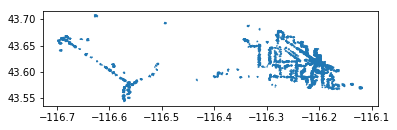

In [27]:
allwalksheds.plot()

In [28]:
allwalksheds.to_file(r"N:\Planning - New File Structure\GIS\Data\Stops\allwalkshedsQtr.shp")